In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# 1. EDA

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data = pd.read_csv("/kaggle/input/titanic/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin, Embarked에 null이 있음

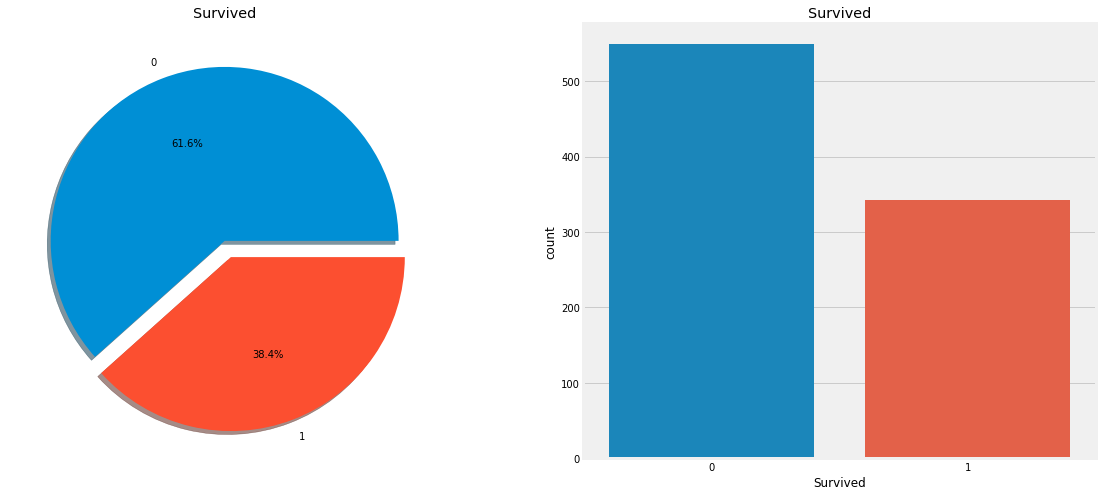

In [5]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie
data["Survived"].value_counts().plot.pie(explode=[0, 0.1], autopct="%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title("Survived")
ax[0].set_ylabel("")

# Countplot
sns.countplot("Survived", data=data, ax=ax[1])
ax[1].set_title("Survived")
plt.show()

전체 탑승객 중, 38.4%만 살아남았음

## 1.1 Analyzing the features

### Sex (categorical)

In [6]:
data.groupby(["Sex", "Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

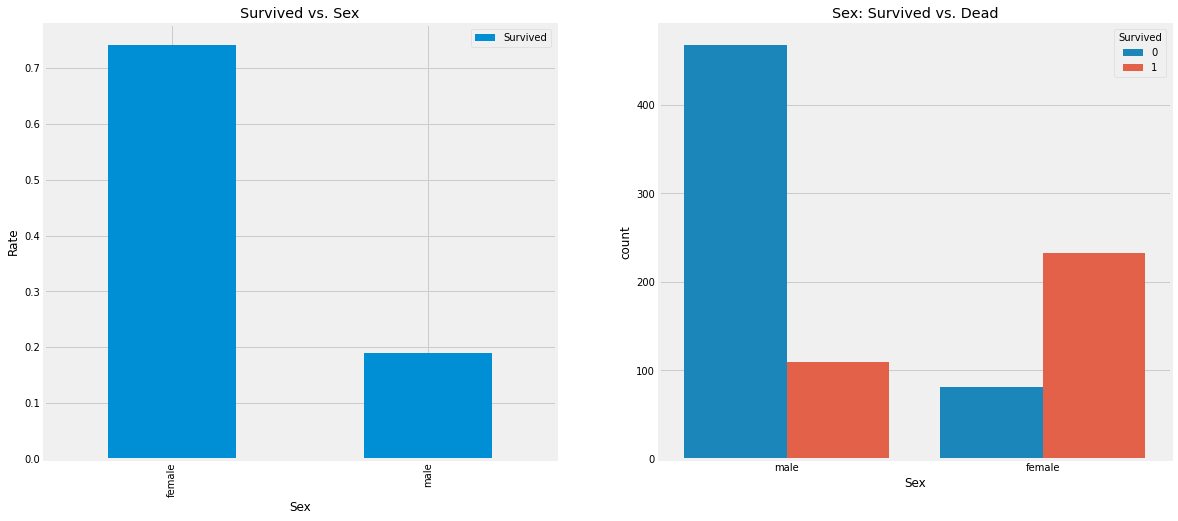

In [7]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# bar
data[["Sex", "Survived"]].groupby(["Sex"]).mean().plot.bar(ax=ax[0])
ax[0].set_title("Survived vs. Sex")
ax[0].set_ylabel("Rate")

# count plot
sns.countplot("Sex", hue="Survived", data=data, ax=ax[1])
ax[1].set_title("Sex: Survived vs. Dead")
plt.show()

여자의 생존률은 75%, 남자는 18~19% 정도임

### Pclass (ordinal)

In [8]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient()

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


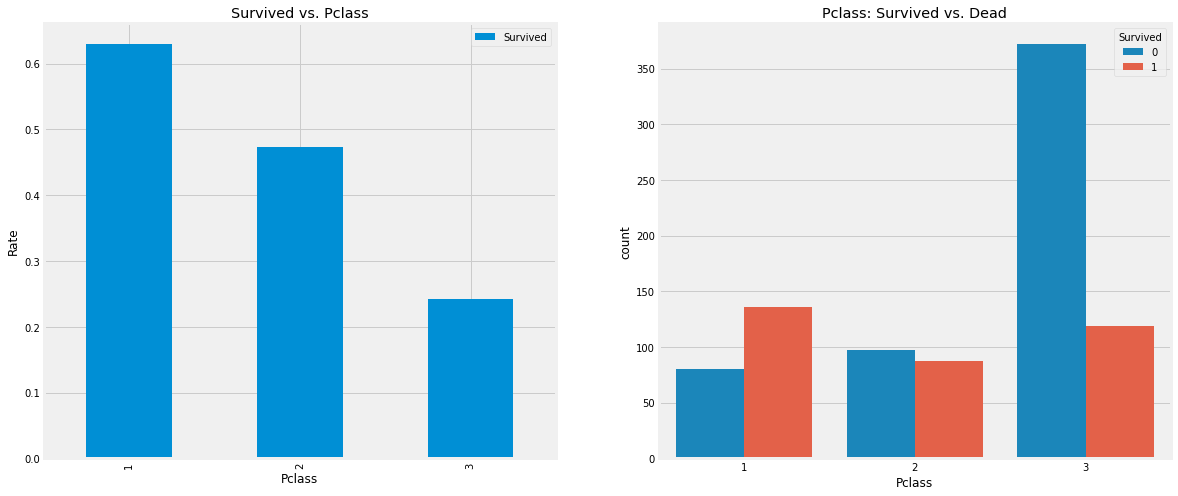

In [9]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# bar
# data["Pclass"].value_counts().plot.bar(ax=ax[0]) 아래 코드로 하는게 더 직관적인 것 같음
data[["Pclass", "Survived"]].groupby(["Pclass"]).mean().plot.bar(ax=ax[0])
ax[0].set_title("Survived vs. Pclass")
ax[0].set_ylabel("Rate")

# countp
sns.countplot("Pclass", hue="Survived", data=data, ax=ax[1])
ax[1].set_title("Pclass: Survived vs. Dead")

plt.show()

1, 2, 3등석 각각의 생존률은 대략 63%, 48%, 24%이다.  
돈많다고 다 사는건 아니지만, 1등석에 탄 사람일수록 구조 우선순위가 높다.

In [10]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient()

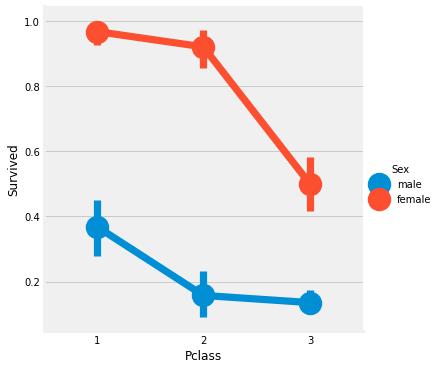

In [11]:
# factorplot
sns.factorplot("Pclass", "Survived", hue="Sex", data=data)
plt.show()

여자이면서 1등석에 탄 사람은 생존률이 거의 95~96%나 된다.  
따라서, Pclass와는 무관하게 여자이면 구조 우선순위가 높다는 것을 알 수 있다.

### Age (continuous)

In [12]:
print("Oldest passenger was of: ", data["Age"].max())
print("Youngest passenger was of: ", data["Age"].min())
print("Average passenger was of: ", data["Age"].mean())

Oldest passenger was of:  80.0
Youngest passenger was of:  0.42
Average passenger was of:  29.69911764705882


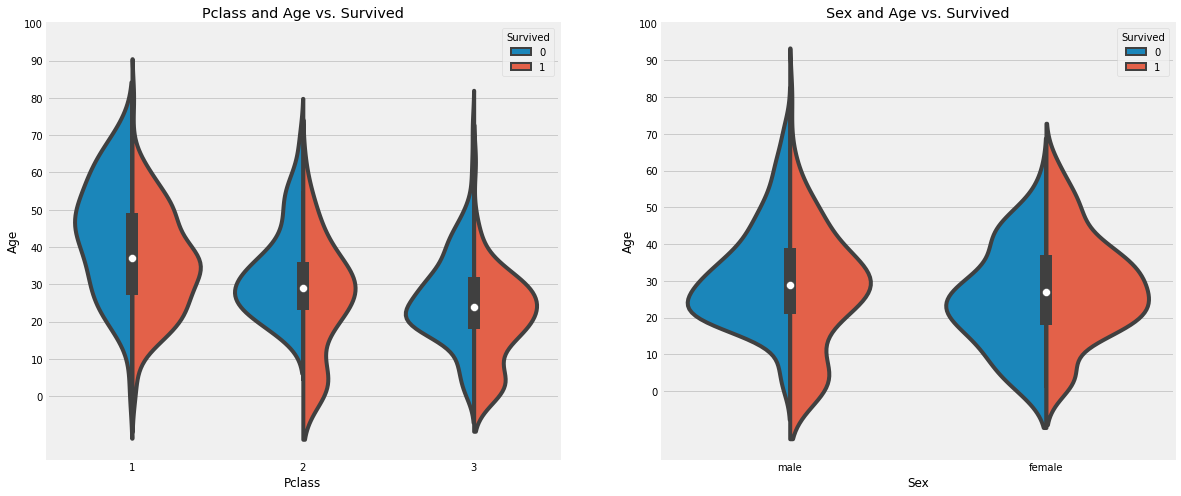

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot("Pclass", "Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title("Pclass and Age vs. Survived")
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot("Sex", "Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title("Sex and Age vs. Survived")
ax[1].set_yticks(range(0, 110, 10))

plt.show()

10세 이하의 아이들은 Pclass가 증가할수록 많아지며, Pclass와 무관하게 생존률이 높다.  
또한, 20~50세의 생존률은 1등석이거나 여자일 경우에 높다.

Age feature에는 null값이 많았는데, 단순히 평균값을 사용하거나 지우는 것은 적절하지 못해보인다.  
따라서, Name feature로 이 값을 채워보자.

In [14]:
data["Initial"] = 0
for i in data:
    data["Initial"] = data.Name.str.extract("([A-Za-z]+)\.") # .으로 끝나는 모든 알파벳으로 이루어진 문자열 추출(정규표현식)

In [15]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient()

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


위 결과 값들을 Mr/Mrs/Master/Miss/Other의 5가지 category로 바꾸자

In [16]:
data.Initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [17]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [18]:
data.groupby("Initial")["Age"].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

이제 위의 5가지 카테고리에 나이를 지정해주자

In [19]:
data.loc[(data.Age.isnull()) & (data.Initial=="Mr"), "Age"] = 33
data.loc[(data.Age.isnull()) & (data.Initial=="Mrs"), "Age"] = 36
data.loc[(data.Age.isnull()) & (data.Initial=="Master"), "Age"] = 5
data.loc[(data.Age.isnull()) & (data.Initial=="Miss"), "Age"] = 22
data.loc[(data.Age.isnull()) & (data.Initial=="Other"), "Age"] = 46

In [20]:
data.Age.isnull().any()

False

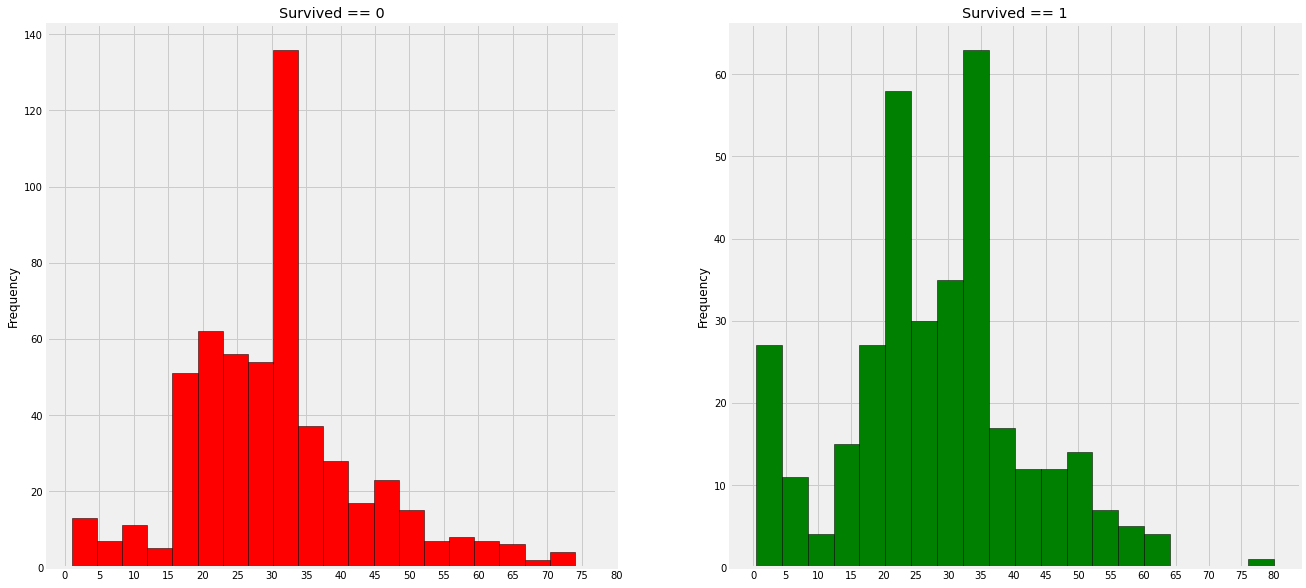

In [21]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# histogram - dead
data[data["Survived"] == 0].Age.plot.hist(ax=ax[0], bins=20, edgecolor="black", color="red")
ax[0].set_title("Survived == 0")
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

# histogram - survived
data[data["Survived"] == 1].Age.plot.hist(ax=ax[1], bins=20, edgecolor="black", color="green")
ax[1].set_title("Survived == 1")
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)

plt.show()

0~5세의 생존률은 높으며, 30~40세의 생존률이 가장 낮다.  
추가로, 가장 나이가 많았던 80세 승객은 살아남았다.  

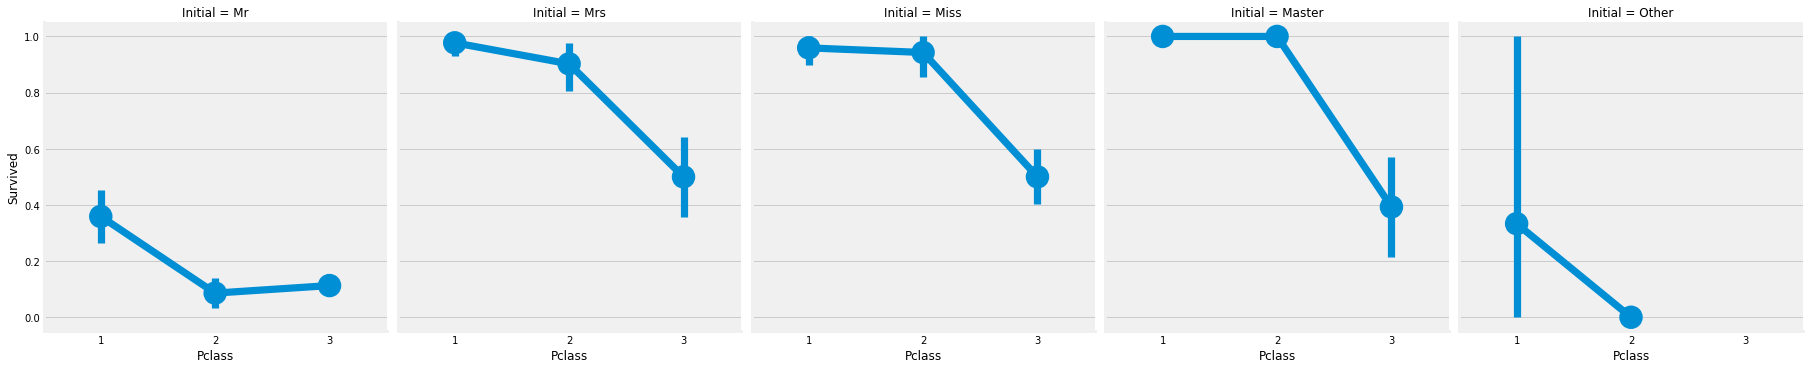

In [22]:
sns.factorplot("Pclass", "Survived", col="Initial", data=data)
plt.show()

위 결과를 통해, 여자거나 어린아이라면 Pclass에 무관하게 생존률이 높다는 것을 알 수 있다. (**<u>The Women and Child First Policy</u>**)

### Embarked (categorical)

In [23]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient()

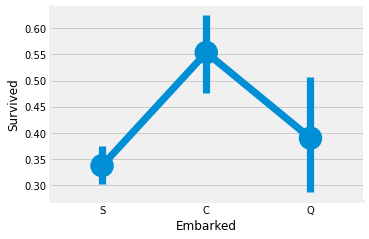

In [24]:
sns.factorplot("Embarked", "Survived", data=data)
plt.gcf().set_size_inches(5, 3)
plt.show()

C항에서 승선한 사람들의 생존률이 가장 높다.  
S항에서 승선한 사람들의 생존률이 가장 낮다.

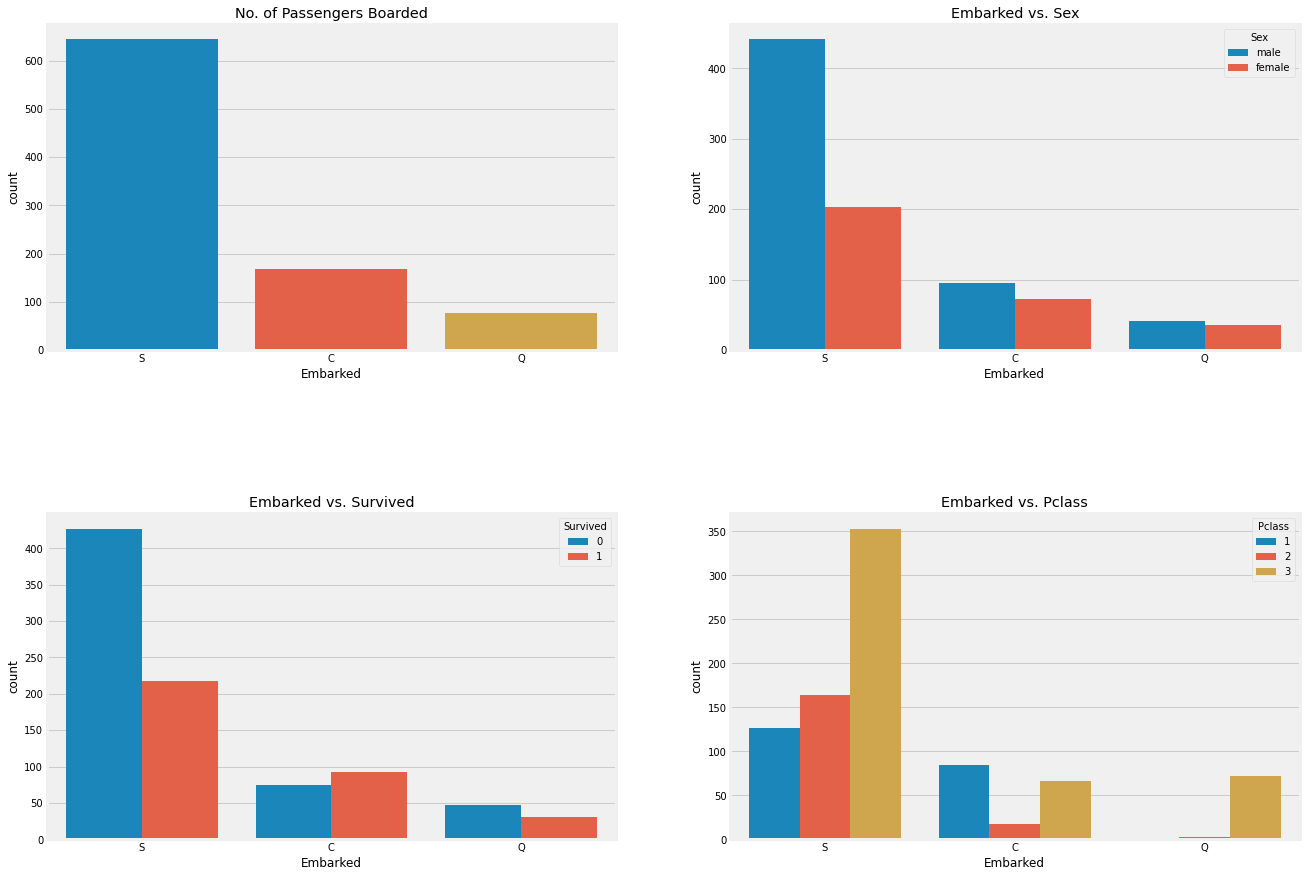

In [25]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot("Embarked", data=data, ax=ax[0, 0])
ax[0, 0].set_title("No. of Passengers Boarded")

sns.countplot("Embarked", hue="Sex", data=data, ax=ax[0, 1])
ax[0, 1].set_title("Embarked vs. Sex")

sns.countplot("Embarked", hue="Survived", data=data, ax=ax[1, 0])
ax[1, 0].set_title("Embarked vs. Survived")

sns.countplot("Embarked", hue="Pclass", data=data, ax=ax[1, 1])
ax[1, 1].set_title("Embarked vs. Pclass")

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

S항에서 가장 많이 탑승했고, 대부분이 Pclass 3이다. (대부분이 Pclass 3이어서 생존률이 낮은 것으로 생각해볼 수 있다.)  
C항에서 탑승한 승객의 경우, 사망자보다 생존자가 더 많다.  
Q항은 95% 이상이 Pclass 3이다.

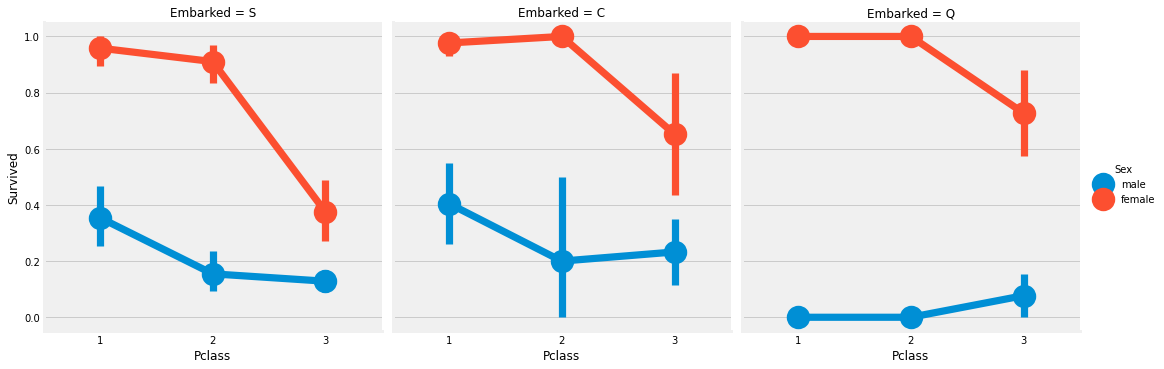

In [26]:
sns.factorplot("Pclass", "Survived", hue="Sex", col="Embarked", data=data)
plt.show()

Pclass 1 또는 2에 해당하는 여자는 생존율이 거의 1에 가깝다.  
S항의 Pclass 3 승객들이 가장 많이 사망했다. **<u>(Money Matters)</u>**
Q항의 남자는 대부분이 사망했다.

In [27]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

Embarked의 경우, null인 값이 2개밖에 없으므로, 가장 많은 탑승객이 있는 S항으로 채운다.

In [28]:
data["Embarked"].fillna("S", inplace=True)
data.Embarked.isnull().any()

False

### SibSp (discrete)

In [29]:
pd.crosstab(data.SibSp, data.Survived, margins=True).style.background_gradient()

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


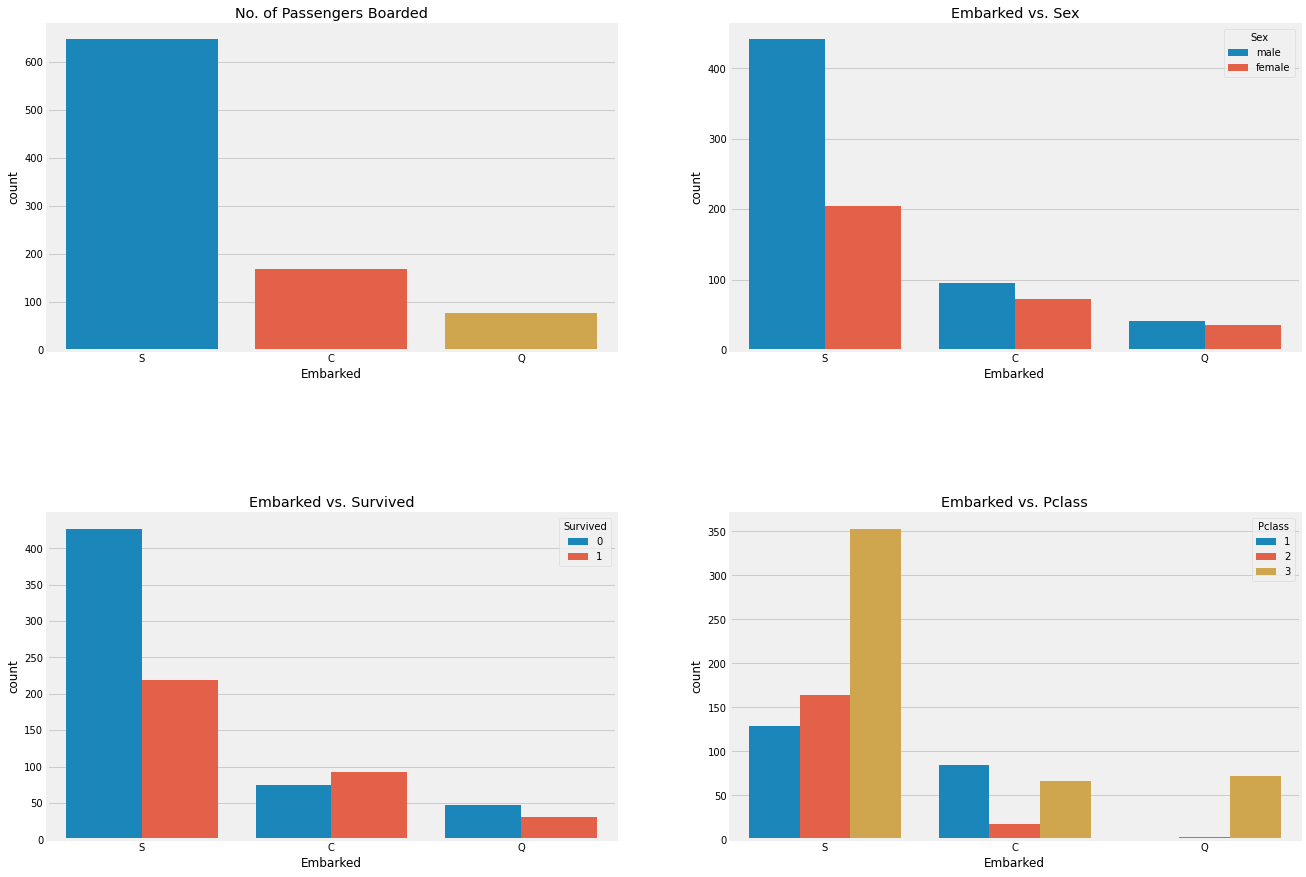

In [30]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot("Embarked", data=data, ax=ax[0, 0])
ax[0, 0].set_title("No. of Passengers Boarded")

sns.countplot("Embarked", hue="Sex", data=data, ax=ax[0, 1])
ax[0, 1].set_title("Embarked vs. Sex")

sns.countplot("Embarked", hue="Survived", data=data, ax=ax[1, 0])
ax[1, 0].set_title("Embarked vs. Survived")

sns.countplot("Embarked", hue="Pclass", data=data, ax=ax[1, 1])
ax[1, 1].set_title("Embarked vs. Pclass")

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

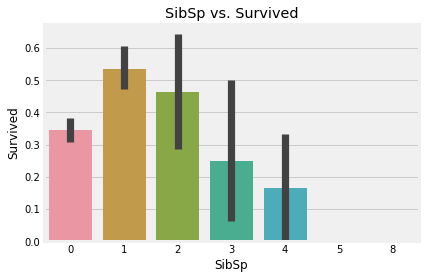

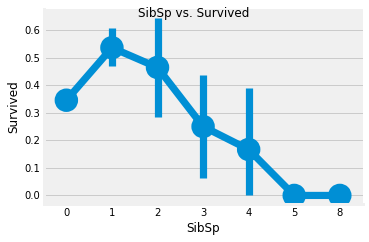

In [31]:
f = sns.barplot("SibSp", "Survived", data=data)
f.set_title("SibSp vs. Survived")

f = sns.factorplot("SibSp", "Survived", data=data)
f.fig.suptitle("SibSp vs. Survived")
plt.gcf().set_size_inches(5, 3)

plt.show()

형제없이 혼자 탑승할 경우의 생존률은 34.5%  
형제수가 증가할수록, 생존률이 감소하는 형태를 보임 (배에 가족이 있으면 나보다 가족을 구하려고 해서...)

In [32]:
pd.crosstab([data.SibSp, data.Survived], data.Pclass).style.background_gradient()

형제 수가 3보다 큰 경우에는 모두 Pclass 3에 해당  
형제 수가 5~8인 경우에는 모두 사망하였는데, 이는 Pclass3인 것도 이유로 볼 수 있음

### Parch

In [33]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient()

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


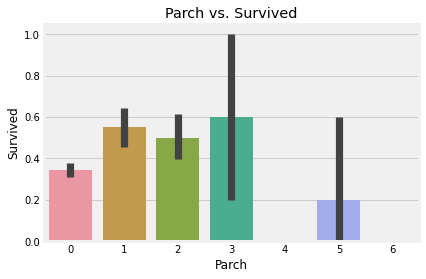

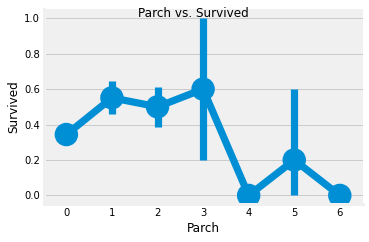

In [34]:
f = sns.barplot("Parch", "Survived", data=data)
f.set_title("Parch vs. Survived")

f = sns.factorplot("Parch", "Survived", data=data)
f.fig.suptitle("Parch vs. Survived")
plt.gcf().set_size_inches(5, 3)

plt.show()

형제의 경우와 마찬가지로, 부모 1~3인과 와 함께 탑승한 승객의 경우 생존률이 높다. (부모가 자식을 살리려고 해서?)
하지만, 부모가 4명이상이 되면 오히려 생존률이 감소하는 모습을 보인다.

### Fare (continuous)

In [35]:
print("Highest fare was: ", data["Fare"].max())
print("Lowest fare was: ", data["Fare"].min())
print("Average fare was: ", data["Fare"].mean())

Highest fare was:  512.3292
Lowest fare was:  0.0
Average fare was:  32.2042079685746


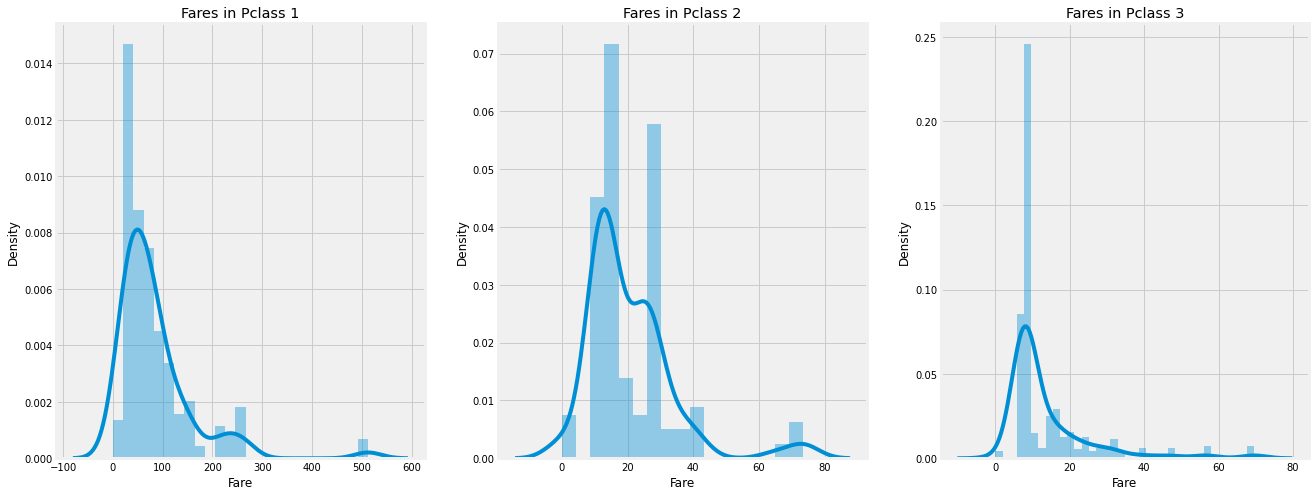

In [36]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.distplot(data[data["Pclass"] == 1].Fare, ax=ax[0])
ax[0].set_title("Fares in Pclass 1")

sns.distplot(data[data["Pclass"] == 2].Fare, ax=ax[1])
ax[1].set_title("Fares in Pclass 2")

sns.distplot(data[data["Pclass"] == 3].Fare, ax=ax[2])
ax[2].set_title("Fares in Pclass 3")

plt.show()

Pclass1의 탑승권 비용이 매우 높다는 것을 알 수 있다.  
Pclass 내에서의 탑승권 가격 분포는 모두 비슷한 양상을 보인다.  
이 값은 continuous하므로, binning을 통해 discrete value로 바꿀 수 있다.

## 1.2 Observtions in a Nutshell for all features

- Sex
    - 여성의 경우, 남성보다 생존율이 더 높다.
- Pclass
    - 1등석 승객이 생존율이 높고, 3등석 승객의 생존율은 아주 낮다.
    - 1등석에 여성일 경우, 거의 생존율이 1에 달한다.
- Age
    - 5세 미만의 경우, 생존율이 높다.
    - 15~35세의 경우, 많이 사망하였다.
- Embarked
    - C항의 경우, 생존율이 사망율보다 높았다.
    - Q항의 경우, 거의 모든 승객이 3등석 사람으로 구성된다.
- Parch+SibSp
    - 1\~2명의 형제자매 또는 배우자가 탑승하거나 1\~3명의 부모가 있는 경우가 혼자 또는 많은 가족이 있을 경우보다 생존율이 높다.

## 1.3 Correlation Between The Features

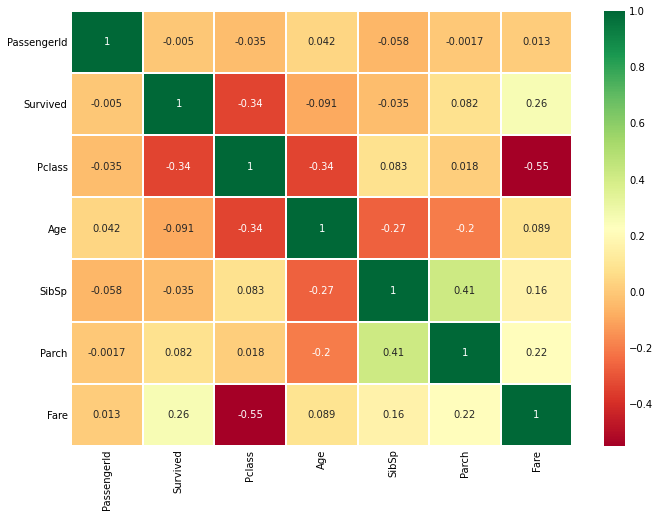

In [37]:
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", linewidths=0.2)
plt.gcf().set_size_inches(10, 8)
plt.show()

위 correlation matrix에서 아주 높은 값은 보이지 않으므로, 모든 feature를 사용하자.

\[참고\]
- Positive correlation
    - feature A가 증가할 때 feature B도 증가한다면 -> A and B are positively correlated
    - 값이 1일 경우 -> perfect positive correlation
- Negative correlation
    - feature A가 증가할 때 feature B가 감소한다면 -> A and B are negatively correlated
    - 값이 -1일 경우 -> perfect negative correlation
- MultiColinearity
    - 두 feature가 highly or perfectively correlated할 경우, 두 feature는 매우 유사한 정보를 가지고 있으며 분산은 아주 적거나 없게 된다. 이러한 경우를 MultiColinearity라고 한다. (거의 동일한 정보를 가지고 있다는 의미)
    - 즉, feature에 redundant가 있는 경우라고 볼 수 있으며 이러한 redundant를 제거하지 않으면 학습에 방해가 될 수 있기 때문에 제거해주어야 한다.


# 2. Feature Engineering and Data Cleaning

### Age_band

- Age는 continuous feature라서 모델이 학습하기 용이한 형태인 categorical로 변경해주자.
    - continuous feature로 age가 왜 학습하기 어려운지?
        - 예를 들어, 운동선수를 연령별로 구분한다면 (30명이 있고, 모두 나이가 다르다고 가정) 총 30개의 값이 있을 수 있으므로 문제가 됨
- continuous를 categorical로 변경하는 방법으로, 여기서는 binning을 사용



In [38]:
# 총 5개의 구간으로 나눔 (최고령자 탑승객의 나이가 80세였으므로, 80/5 = 16)
data["Age_band"] = 0
data.loc[data["Age"] <= 16, "Age_band"] = 0
data.loc[(data["Age"] > 16) & (data["Age"] <= 32), "Age_band"] = 1
data.loc[(data["Age"] > 32) & (data["Age"] <= 48), "Age_band"] = 2
data.loc[(data["Age"] > 48) & (data["Age"] <= 64), "Age_band"] = 3
data.loc[data["Age"] > 64, "Age_band"] = 4

data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [39]:
data["Age_band"].value_counts()

1    382
2    325
0    104
3     69
4     11
Name: Age_band, dtype: int64

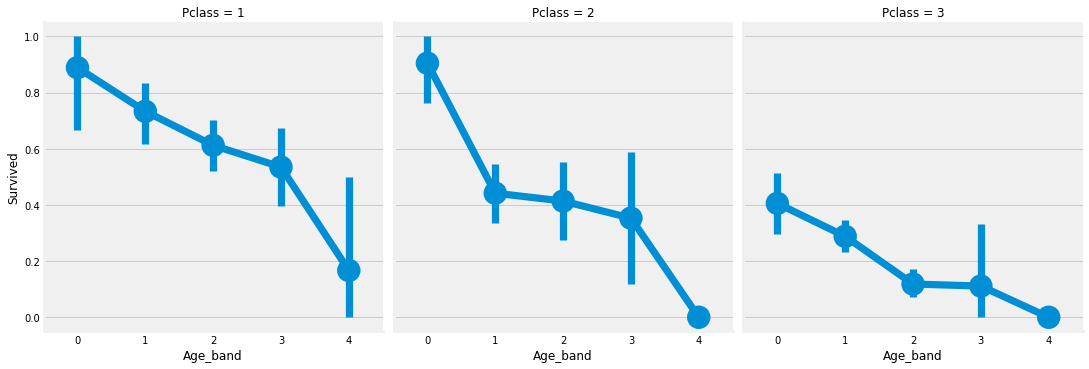

In [40]:
sns.factorplot("Age_band", "Survived", data=data, col="Pclass")
plt.show()

Pclass와 무관하게, 나이가 증가할수록 생존률은 낮아진다.

### Family_Size and Alone

Family_size = Parch + SibSp

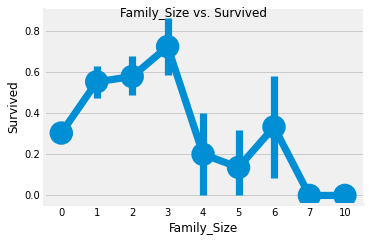

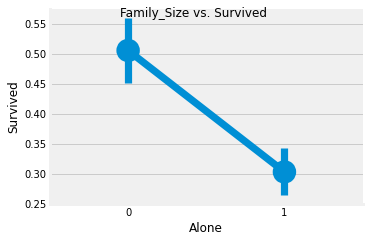

In [41]:
# Family_Size
data["Family_Size"] = 0
data["Family_Size"] = data["Parch"] + data["SibSp"]

# Alone
data["Alone"] = 0
data.loc[data.Family_Size == 0, "Alone"] = 1

f = sns.factorplot("Family_Size", "Survived", data=data)
f.fig.suptitle("Family_Size vs. Survived")
plt.gcf().set_size_inches(5, 3)

f = sns.factorplot("Alone", "Survived", data=data)
f.fig.suptitle("Family_Size vs. Survived")
plt.gcf().set_size_inches(5, 3)

plt.show()

Family_Size = 0일 경우, 생존율이 매우 낮음  
Family_Size가 4부터는 생존율이 감소

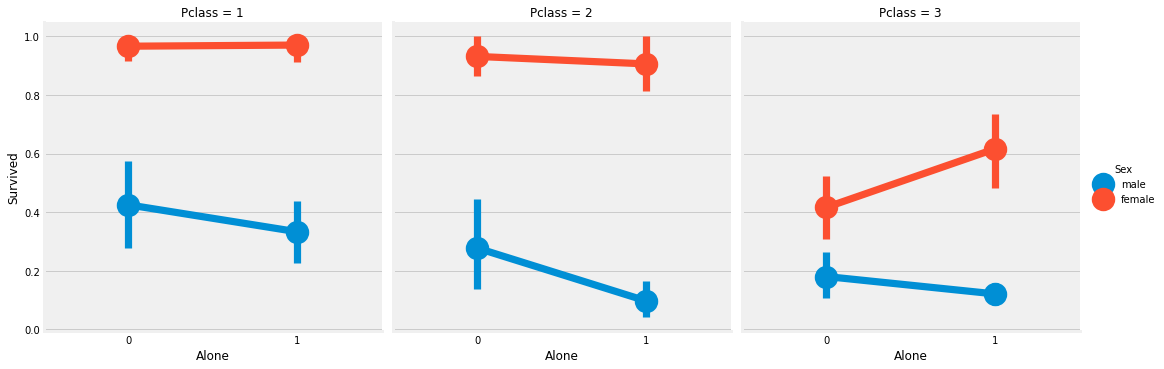

In [42]:
sns.factorplot("Alone", "Survived", data=data, hue="Sex", col="Pclass")
plt.show()

Pclass1과 2에서는 Alone일 경우 사망율이 높음  
Pclass3에서는 Alone일 경우 여성은 오히려 가족이 있는 경우보다 생존율이 높음

### Fare_Range

fare도 continuous feature이기 때문에 ordinal value로 바꾸어주자.

In [43]:
data["Fare_Range"] = pd.qcut(data["Fare"], 4)
data.groupby("Fare_Range")["Survived"].mean().to_frame().style.background_gradient()

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


Fare_Range가 증가하면 생존율도 증가한다.

위의 Fare_Range 구간별로 categorical하게 feature를 만들어주자

In [44]:
data["Fare_cat"] = 0
data.loc[data["Fare"] <= 7.91, "Fare_cat"] = 0
data.loc[(data["Fare"] > 7.91) & (data["Fare"] <= 14.454), "Fare_cat"] = 1
data.loc[(data["Fare"] > 14.454) & (data["Fare"] <= 31.0), "Fare_cat"] = 2
data.loc[(data["Fare"] > 31.0) & (data["Fare"] <= 512.329), "Fare_cat"] = 3

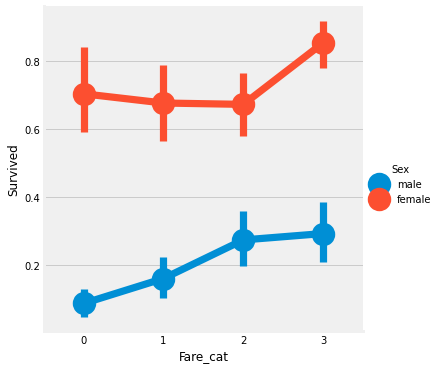

In [45]:
sns.factorplot("Fare_cat", "Survived", data=data, hue="Sex")
plt.show()

Fare_cat이 증가하면 생존율도 증가한다.

### Converting String Values into Numeric

문자열 데이터를 숫자로 바꿔주자

In [46]:
data["Sex"].replace(["male", "female"], [0, 1], inplace=True)
data["Embarked"].replace(["S", "C", "Q"], [0, 1, 2], inplace=True)
data["Initial"].replace(["Mr", "Mrs", "Miss", "Master", "Other"],
                        [0, 1, 2, 3, 4], inplace=True)

### Dropping UnNeeded Features

- Name: categorical value로 변환도 불가능하고 필요 없음
- Age: `Age_band` feature가 있으므로 필요 없음
- Ticket: categorical value로 변환도 불가능하고 필요 없음
- Fare: `Fare_cat` feature가 있으므로 필요 없음
- Cabin: NaN 값이 너무 많은데다가 많은 승객들이 여러개의 cabin들을 가지고 있으므로 삭제
- Fare_Range: `Fare_cat` feature가 있으므로 필요 없음
- PassengerId: categorical value로 변환도 불가능하고 필요 없음

In [47]:
data.drop(["Name", "Age", "Ticket", "Fare", "Cabin", "Fare_Range", "PassengerId"],
          axis=1, inplace=True)

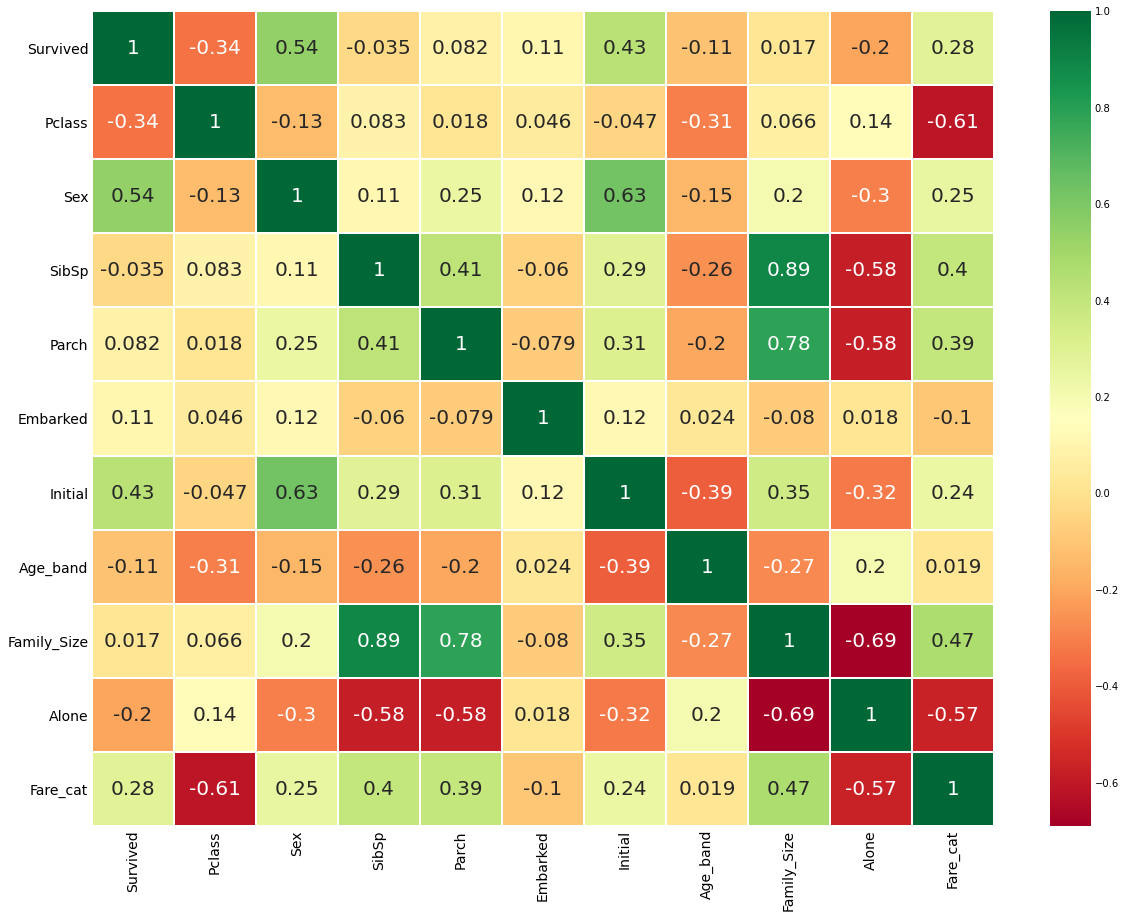

In [48]:
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn",
            linewidths=0.2, annot_kws={"size": 20})

plt.gcf().set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()



Positively correlated feature들

- SibSp와 Family_Size: 0.89
- Parch와 Family_Size: 0.78

Negatively correlated feature들

- Alone and Family_Size: -0.69

